# Modelos de Resposta Binária: **Estimando Probabilidades**

Qual o impacto de um ano adicional de estudo na decisão da mulher de entrar (=1) ou não (=0) na força de trabalho? 

E do número de filhos? Há diferença entre filhos pequenos e aqueles com mais idade?

----

## Leitura dos Dados

In [1]:
## Importando o que for necessário
# Manipulação de dados
import pandas as pd
import numpy as np

# Testes e regressões
from scipy import stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols, probit, logit  # modelos binários!

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('ggplot')  # estilo do R

"""
Vamos usar o statsmodels (probit e logit) para os modelos, mas outro
módulo conhecido para executar regressões logísticas, especialmente no
contexto de Machine Learning, é o sklearn (LogisticRegression)
"""

'\nVamos usar o statsmodels (probit e logit) para os modelos, mas outro\nmódulo conhecido para executar regressões logísticas, especialmente no\ncontexto de Machine Learning, é o sklearn (LogisticRegression)\n'

In [2]:
### Montando o Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Lendo os dados
sCaminho = "/Users/vinicius/Meu Drive/UnB/Econometria/datasets/IDP/"
sArquivo = "mroz.dta"

## Lendo o DataFrame
data = pd.read_stata(f"{sCaminho}{sArquivo}")

# Vendo o tamanho da base
print(f"Linhas: {data.shape[0]}; Colunas: {data.shape[1]}")

Linhas: 753; Colunas: 22


In [4]:
## Vendo o DataFrame
data.head(10)

# inlf: dummy qu indica se está na força de trabalho (labor force)
# hours: horas trabalhadas no ano
# kidslt6: número de filhos com menos de 6 anos
# kidsge6: número de filhos com mais de 6 anos
# wage: salário/hora estimado
# repwage: salário/hora reportado

# prefixo hus: dados do marido (husband)

# faminc: renda familiar total
# mtr: taxa marginal do imposto de renda (marginal tax rate)
# motheduc, fatheduc: anos de escolaridade dos pais
# unem: taxa de desemprego na cidade onde mora
# city: dummy quee indica se mora em grandes cidades
# exper: anos de experiênca
# nwifeinc: (faminc - wage*hours)/1000 (renda familiar não proveniente da mulher)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
1,1.0,1656.0,0.0,2.0,30.0,12.0,1.3889,2.65,2310.0,30.0,...,21800.0,0.6615,7.0,7.0,11.0,1.0,5.0,19.499981,0.328512,25.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0
5,1.0,2032.0,0.0,0.0,54.0,12.0,4.7421,4.70,1040.0,57.0,...,19495.0,0.6915,14.0,7.0,7.5,1.0,33.0,9.859054,1.556480,1089.0
6,1.0,1440.0,0.0,2.0,37.0,16.0,8.3333,5.95,2670.0,37.0,...,21152.0,0.6915,14.0,7.0,5.0,0.0,11.0,9.152048,2.120260,121.0
7,1.0,1020.0,0.0,0.0,54.0,12.0,7.8431,9.98,4120.0,53.0,...,18900.0,0.6915,3.0,3.0,5.0,0.0,35.0,10.900040,2.059634,1225.0
8,1.0,1458.0,0.0,2.0,48.0,12.0,2.1262,0.00,1995.0,52.0,...,20405.0,0.7515,7.0,7.0,3.0,0.0,24.0,17.305000,0.754336,576.0
9,1.0,1600.0,0.0,2.0,39.0,12.0,4.6875,4.15,2100.0,43.0,...,20425.0,0.6915,7.0,7.0,5.0,0.0,21.0,12.925000,1.544899,441.0


In [5]:
## Descrevendo o DataFrame
data.describe()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000
mean,0.568393,740.576355,0.237716,1.353254,42.537849,12.286853,4.177680,1.849734,2267.270996,45.120850,12.491368,7.482180,23080.595703,0.678862,9.250996,8.808765,8.623506,0.642762,10.630810,20.128967,1.190173,178.038513
std,0.495631,871.314392,0.523957,1.319876,8.072577,2.280245,3.310283,2.419891,595.566650,8.058786,3.020799,4.230559,12190.203125,0.083495,3.367467,3.572287,3.114935,0.479505,8.069145,11.634795,0.723198,249.630646
min,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,3.000000,0.412100,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.000000,-0.029058,-2.054164,0.000000
25%,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,2.262600,0.000000,1928.000000,38.000000,11.000000,4.788300,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.000000,13.025040,0.816509,16.000000
50%,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,3.481900,0.000000,2164.000000,46.000000,12.000000,6.975800,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.000000,17.700001,1.247574,81.000000
75%,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,4.970750,3.580000,2553.000000,52.000000,15.000000,9.166700,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.000000,24.466000,1.603571,225.000000
max,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,17.000000,40.508999,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.000000,96.000000,3.218876,2025.000000


## Modelo de Probabilidade Linear (MPL): MQO aplicado a variáveis binárias

O modelo mais simples para estimar a probabilidade consiste em usar MQO para determinar o impacto das variáveis na "escolha" das mulheres de trabalhar ou não.
Para isso, basta colocar a variável binária de decisão como a variável dependente no modelo. 

Contudo, há um *trade-off* entre simplicidade e robustez do modelo:

- O MPL pode gerar resultados menores que 0 ou maiores que 1 (por definição, $0 ≤ Prob ≤ 1$). De modo geral, o MPL funciona melhor com os valores de variáveis independentes próximos à **média** da amostra.

- Estatisticamente, a distribuição de uma variável binária é do tipo Bernoulli, e não normal.

- Ainda falando de estatística, a variânca de uma variável aleatória com distribuição Bernoulli é $var(y | X) = p(1-p)$, onde $p$ é a probabilidade. Como $p$ é função do vetor $X$, o erro jamais será homoscedástico (variância constante ao longo de $X$), o que inviabiliza nossos erros-padrão e torna inválida qualquer inferência estatística não-robusta.

- Por fim, como o modelo é linear, todos os efeitos das variáveis independentes são constantes. No exemplo, passar de 0 pra 1 filho com menos de 6 anos teria o mesmo efeito de passar de 2 pra 3, o que parece pouco verossímil.

In [6]:
## Criando o MPL
# Formula (com experiência quadrática)
formula = "inlf ~ nwifeinc + educ + exper + I(exper**2) + age + kidslt6 + kidsge6"

# Modelo com covariância robusta
modelo_mpl = ols(formula=formula, data=data).fit(cov_type="HC1", use_t=True)

# Resultados
print(modelo_mpl.summary())

# nwifeinc: quanto maior a renda da família, menor a chance de a mulher trabalhar
# educ: um ano a mais de estudo aumenta em 3,8% a chance da mulher participar do mercado de trabalho, tudo o mais constante
# kidslt6: ter filhos menores diminui muito (-26,18%) a chance de a mulher trabalhar; 
# filhos maiores, por outro lado, não afetam de forma estatisticamente significativa essa probabilidade

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     62.48
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.30e-70
Time:                        15:31:23   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5855      0.152      3.846

In [7]:
## Vamos realizar um teste de Breusch-Pagan para verificar a heteoscedasticidade
# Lembrando: o teste é um diagnóstico que indica se precisamos ou não usar os erros robustos acima
# e seu resultado não é afetado pela matriz de covariância usada no modelo
teste_heteroscedasticidade = sms.het_breuschpagan(modelo_mpl.resid, modelo_mpl.model.exog)

# Pegando o p-valor
print(f"P-valor: {teste_heteroscedasticidade[3]}")
print("H0: homoscedasticidade.")

# Como esperado, os valores são heteroscedásticos

P-valor: 0.0009523498962160502
H0: homoscedasticidade


In [8]:
## O que é mais interessante é ver os valores previstos pelo modelo
# Pegando os valores previstos e adicionando como coluna
data["pred_mpl"] = modelo_mpl.predict()

data[["inlf", "pred_mpl"]].describe()

# Valor mínimo de -0.34 e máximo de 1.12, o que não faz sentido!

,inlf,pred_mpl
count,753.000000,753.000000
mean,0.568393,0.568393
std,0.495631,0.254763
min,0.000000,-0.345110
25%,0.000000,0.401575
50%,1.000000,0.587970
75%,1.000000,0.759198
max,1.000000,1.127151


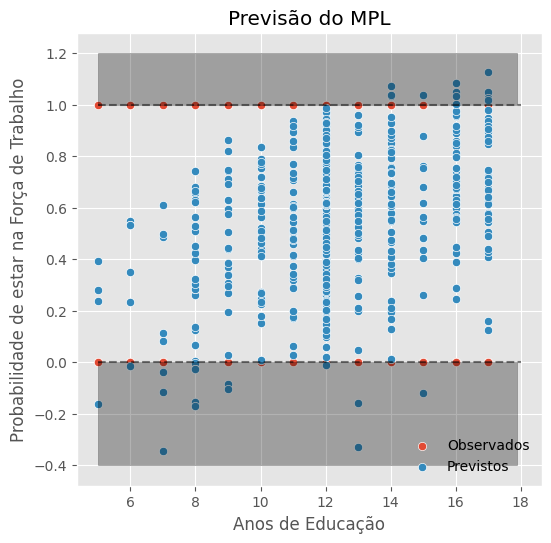

In [9]:
## Plottando
# Objeto gráfico
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Valores observados
sns.scatterplot(x="educ", y="inlf", data=data, label="Observados")

# Previstos
sns.scatterplot(x="educ", y="pred_mpl", data=data, label="Previstos")

# Linhas horizontais no 0 e no 1
plt.hlines(y=0, xmin=5, xmax=18, linestyles="--", color='k', alpha=0.5)
plt.hlines(y=1, xmin=5, xmax=18, linestyles="--", color='k', alpha=0.5)

# Áreas sombreadas para indicar probabilidades inválidas
plt.fill_between(x=np.arange(5, 18, 0.1), y1=1, y2=1.2, color='k', alpha=0.3)
plt.fill_between(x=np.arange(5, 18, 0.1), y1=0, y2=-0.4, color='k', alpha=0.3)

# Títulos e Eixos
plt.title("Previsão do MPL")
plt.xlabel("Anos de Educação")
plt.ylabel("Probabilidade de estar na Força de Trabalho")

# Legenda
plt.legend(facecolor=None, frameon=False, loc='lower right')

## Probit e Logit

Para contornar os problemas do MPL, podemos usar modelos que se baseiam em funções que, por construção, sempre produzem valores entre 0 e 1.

Esse é o caso da **função de distribuição normal acumulada** - que dará origem ao modelo *probit* - e da **função logística**, que produzirá o *logit* ou a famosa *Regressão Logística*.

Note que as funções usadas não são mais lineares, ou seja, não podemos usar MQO comum para a estimação. Matematicamente, os estimadores usados são os de máxima verossimilhança (MV), que já contém propriedades desejáveis contra heteroscedasticidades e inconsistências/viéses.

### Comportamento das Funções

In [11]:
### Vamos simular dados para ver os gráficos das funções usadas
## Usando o scipy.stats para gerar a distribuição acumulada de uma função logística
## Para compatibilizar com a norrmal, vamos usar o intervalo de -4 a 4
# cdf: cumulative distribution function
vLogistica = stats.logistic.cdf(np.arange(-4, 4, 0.1))

## Usando o mesmo método para gerar a distribuição acumulada da normal
vNormal = stats.norm.cdf(np.arange(-4, 4, 0.1))

Text(0, 0.5, 'Probabilidade')

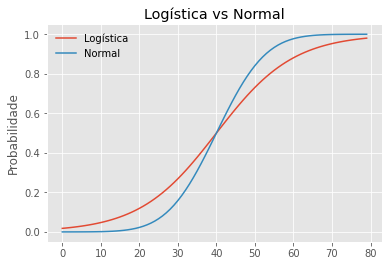

In [12]:
## Plottando
# Logística
plt.plot(vLogistica)

# Normal
plt.plot(vNormal)

# Legenda
plt.legend(frameon=False, facecolor=None, labels=["Logística", 'Normal'])

# Títulos
plt.title("Logística vs Normal")
plt.ylabel("Probabilidade")

# Logística: mais suave
# Normal: mais concentrada nos valores médios/medianos

### Modelos

#### Logit

In [13]:
## Usaremos a mesma fórmula do MPL
## Convenientemente, por usarmos o statsmodels, a sintaxe é igual à de um MQO normal
modelo_logit = logit(formula, data).fit(use_t=True, cov_type='HC1')

## Printando sumário
print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.533553
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.2197
Time:                        15:33:04   Log-Likelihood:                -401.77
converged:                       True   LL-Null:                       -514.87
Covariance Type:                  HC1   LLR p-value:                 3.159e-45
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4255      0.859      0.495      0.621      -1.261       2.112
nwifeinc         -0.

Note que o sumário é um pouco diferente das regressões comuns, haja vista a não-linearidade e a estimação por máxima-verossimilhança (method=MLE). A grosso modo:

- $R^2$ se torna o **Pseudo-R2** e tem interpretação igual a antes (quanto mais próximo de 1, melhor)
- Log-Likelihood e LLR p-value são os valores das estatísticas $F$ e $Prob(F)$, que indicam a signficância do modelo. No caso acima, o p-valor é muito baixo e, logo, o modelo é significante.

Contudo, como o modelo não é linear, os valores dos parâmetros acima não refletem os valores marginais das variáveis (matematicamente, eles não são iguais à derivada parcial em virtude da regra da cadeia). 

De fato, temos que colocar os coeficientes estimados e os valores das características individuais na função do modelo, o que não é tão fácil de se fazer.

Além disso, há diversas formas de se realizar essa tarefa. Seguindo o que recomenda Wooldridge (2011), vamos usar o efeito parcial médio (em inglês, *APE* ou *overall*). Resumidamente, calcula-se o efeito parcial para cada indivíduo da amostra e depois tira-se a média desses efeitos.

Mais detalhes podem ser vistos no capítulo 17 de seu livro "Introdução à Econometria".

In [14]:
## Captando os efeitos marginais
efeitos_marginais_logit = modelo_logit.get_margeff(at='overall')
print(efeitos_marginais_logit.summary())

        Logit Marginal Effects       
Dep. Variable:                   inlf
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
nwifeinc         -0.0038      0.002     -2.395      0.017      -0.007      -0.001
educ              0.0395      0.007      5.275      0.000       0.025       0.054
exper             0.0368      0.005      7.055      0.000       0.027       0.047
I(exper ** 2)    -0.0006      0.000     -3.190      0.001      -0.001      -0.000
age              -0.0157      0.002     -6.592      0.000      -0.020      -0.011
kidslt6          -0.2578      0.032     -7.971      0.000      -0.321      -0.194
kidsge6           0.0107      0.014      0.754      0.451      -0.017       0.039


O modelo logit indica que o efeito parcial médio de um ano a mais de estudo é de cerca de 3,95%, maior que o observado no MPL. O resultado de kidslt6 é similar ao visto no MPL.

In [15]:
## Contudo, podemos também ver os efeitos no zero, ou seja, uma mudança de 0 para 1, o que não era possível no MPL
efeitos_marginais_logit0 = modelo_logit.get_margeff(at='zero')
print(efeitos_marginais_logit0.summary())

# Vemos que os valores de educ aumentam, ou seja, anos adicionais em mulheres com maior escolaridade
# afetam menos sua decisão do que entre as mulheres menos educadas

# Além disso, o efeito do primeiro filho menor de 6 anos é muito mais pronunciado, em linha com o que esperávamos

        Logit Marginal Effects       
Dep. Variable:                   inlf
Method:                          dydx
At:                              zero
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
nwifeinc         -0.0051      0.002     -2.097      0.036      -0.010      -0.000
educ              0.0529      0.018      2.953      0.003       0.018       0.088
exper             0.0492      0.013      3.882      0.000       0.024       0.074
I(exper ** 2)    -0.0008      0.000     -2.529      0.011      -0.001      -0.000
age              -0.0210      0.003     -8.195      0.000      -0.026      -0.016
kidslt6          -0.3450      0.065     -5.342      0.000      -0.472      -0.218
kidsge6           0.0144      0.020      0.704      0.482      -0.026       0.054


In [16]:
## Por fim, grafando os resultados
# Pegando os valores previstos e adicionando como coluna
data["pred_logit"] = modelo_logit.predict()

data[["inlf", "pred_logit"]].describe()

# Nenhum valor menor que 0 ou maior que 1!

,inlf,pred_logit
count,753.000000,753.000000
mean,0.568393,0.568393
std,0.495631,0.258518
min,0.000000,0.008672
25%,0.000000,0.366410
50%,1.000000,0.610925
75%,1.000000,0.796720
max,1.000000,0.968541


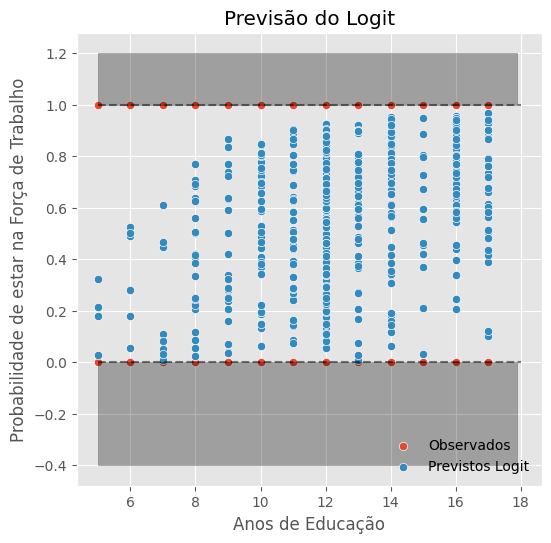

In [17]:
## Plottando
# Objeto gráfico
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Valores observados
sns.scatterplot(x="educ", y="inlf", data=data, label="Observados")

# Previstos
sns.scatterplot(x="educ", y="pred_logit", data=data, label="Previstos Logit")

# Linhas horizontais no 0 e no 1
plt.hlines(y=0, xmin=5, xmax=18, linestyles="--", color='k', alpha=0.5)
plt.hlines(y=1, xmin=5, xmax=18, linestyles="--", color='k', alpha=0.5)

# Áreas sombreadas para indicar probabilidades inválidas
plt.fill_between(x=np.arange(5, 18, 0.1), y1=1, y2=1.2, color='k', alpha=0.3)
plt.fill_between(x=np.arange(5, 18, 0.1), y1=0, y2=-0.4, color='k', alpha=0.3)

# Títulos e Eixos
plt.title("Previsão do Logit")
plt.xlabel("Anos de Educação")
plt.ylabel("Probabilidade de estar na Força de Trabalho")

# Legenda
plt.legend(facecolor=None, frameon=False, loc='lower right')

#### Probit

In [18]:
## Seguiremos o mesmo procedimento acima a fim de comparar as estimativas
modelo_probit = probit(formula, data).fit(use_t=True, cov_type='HC1')

## Printando sumário
print(modelo_probit.summary())

# O pseudo R2 do probit é ligeiramente maior (+ 0.0009), mas nada muito grande
# Ambos os modelos são significativos (vide LLR p-value)

Optimization terminated successfully.
         Current function value: 0.532938
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.2206
Time:                        15:35:08   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
Covariance Type:                  HC1   LLR p-value:                 2.009e-45
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2701      0.505      0.535      0.593      -0.721       1.261
nwifeinc         -0.

In [19]:
## Captando os efeitos marginais
efeitos_marginais_probit = modelo_probit.get_margeff(at='overall')
print("Probit:")
print(efeitos_marginais_probit.summary())

print("Logit:")
print(efeitos_marginais_logit.summary())

# Educ iguais, mas probit preve um efeito maior para a queda na participação em virtude de filhos pequenos

Probit:
       Probit Marginal Effects       
Dep. Variable:                   inlf
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
nwifeinc         -0.0036      0.002     -2.296      0.022      -0.007      -0.001
educ              0.0394      0.007      5.323      0.000       0.025       0.054
exper             0.0371      0.005      7.115      0.000       0.027       0.047
I(exper ** 2)    -0.0006      0.000     -3.200      0.001      -0.001      -0.000
age              -0.0159      0.002     -6.779      0.000      -0.020      -0.011
kidslt6          -0.2612      0.032     -8.252      0.000      -0.323      -0.199
kidsge6           0.0108      0.014      0.797      0.426      -0.016       0.037
Logit:
        Logit Marginal Effects       
Dep. Variable:                   inlf
Method:            

In [ ]:
## Captando os efeitos marginais no 0
efeitos_marginais_probit0 = modelo_probit.get_margeff(at='zero')
print("Probit:")
print(efeitos_marginais_probit0.summary())

print("Logit:")
print(efeitos_marginais_logit0.summary())

# Logit capta um efeito positivo da educação maior
# Diferentemente do observado nas médias, o efeito de kidslt6 no logit é 1 p.p. maior (em módulo) que o do probit

Probit:
       Probit Marginal Effects       
Dep. Variable:                   inlf
Method:                          dydx
At:                              zero
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
nwifeinc         -0.0046      0.002     -2.102      0.036      -0.009      -0.000
educ              0.0504      0.015      3.343      0.001       0.021       0.080
exper             0.0474      0.011      4.503      0.000       0.027       0.068
I(exper ** 2)    -0.0007      0.000     -2.701      0.007      -0.001      -0.000
age              -0.0203      0.002     -9.707      0.000      -0.024      -0.016
kidslt6          -0.3340      0.052     -6.398      0.000      -0.436      -0.232
kidsge6           0.0138      0.018      0.755      0.450      -0.022       0.050
Logit:
        Logit Marginal Effects       
Dep. Variable:                   inlf
Method:            

In [20]:
## Por fim, grafando os resultados
# Pegando os valores previstos e adicionando como coluna
data["pred_probit"] = modelo_probit.predict()

data[["inlf", "pred_logit", "pred_probit"]].describe()

,inlf,pred_logit,pred_probit
count,753.000000,753.000000,753.000000
mean,0.568393,0.568393,0.570109
std,0.495631,0.258518,0.258361
min,0.000000,0.008672,0.002475
25%,0.000000,0.366410,0.370959
50%,1.000000,0.610925,0.609547
75%,1.000000,0.796720,0.794346
max,1.000000,0.968541,0.979904


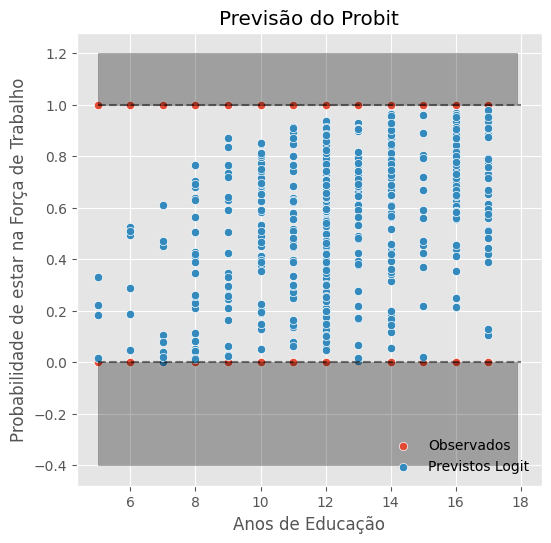

In [21]:
## Plottando
# Objeto gráfico
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Valores observados
sns.scatterplot(x="educ", y="inlf", data=data, label="Observados")

# Previstos
sns.scatterplot(x="educ", y="pred_probit", data=data, label="Previstos Logit")

# Linhas horizontais no 0 e no 1
plt.hlines(y=0, xmin=5, xmax=18, linestyles="--", color='k', alpha=0.5)
plt.hlines(y=1, xmin=5, xmax=18, linestyles="--", color='k', alpha=0.5)

# Áreas sombreadas para indicar probabilidades inválidas
plt.fill_between(x=np.arange(5, 18, 0.1), y1=1, y2=1.2, color='k', alpha=0.3)
plt.fill_between(x=np.arange(5, 18, 0.1), y1=0, y2=-0.4, color='k', alpha=0.3)

# Títulos e Eixos
plt.title("Previsão do Probit")
plt.xlabel("Anos de Educação")
plt.ylabel("Probabilidade de estar na Força de Trabalho")

# Legenda
plt.legend(facecolor=None, frameon=False, loc='lower right')

# Obrigado!